<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/6_1_ML_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 6.1 Modelos de machine learning - SMOTE

Nesta secção são apresentados <u>modelos tradicionais</u> de **machine learning**, tendo os dados de treino sido aumentados via <u>oversampling</u> (SMOTE).
Começamos por colocar as imagens numa lista, de modo a servirem de input para os modelos.

Técnicas exigem que dados de input estejam em vetores.

In [ ]:
def X_to_vector(X):
  X_all_vec=[]
  X_allReshaped = X.reshape(len(X),200,200)
  print(X_allReshaped.shape)
  for i in X_allReshaped:
      img = i
      #print(img.shape)
      cols,colors = img.shape # gives dimensions for RGB array
      img_size = cols*colors
      img_1D_vector = img.reshape(img_size)
      # you can recover the orginal image with:
      img2 = img_1D_vector.reshape(cols,colors)
      X_all_vec.append(img_1D_vector)
  return X_all_vec

In [ ]:
X_train_vec=X_to_vector(X_train)
X_test_vec=X_to_vector(X_test)

(3346, 200, 200)
(2049, 200, 200)


### 6.1.1 Random Forests
O primeiro modelo de ML a testar é uma Random Forest.

In [ ]:
Rfc = RandomForestClassifier(n_estimators = 200, criterion = "entropy", random_state = 42,
                                      min_samples_split=10,min_samples_leaf=1,
                                      max_features='sqrt',max_depth=90,bootstrap=False)

Rfc=Rfc.fit(X_train_vec, y_train)
y_pred_4  = Rfc.predict(X_test_vec)


Accuracy_total_Rfc=Rfc.score(X_test_vec, y_test)
print('Accuracy total:',Accuracy_total_Rfc)

cm = confusion_matrix(y_test, y_pred_4)
conf_mat=pd.DataFrame(cm)
conf_mat.index.name='Actual'
conf_mat.columns.name='Predicted'
print(conf_mat)

print('accuracy total:', accuracy(cm))
print('precision covid:', precision(0,cm))
print('recall covid:', recall(0,cm))
print('precision total:', precision_macro_average(cm))
print('recall total:', recall_macro_average(cm))
print("label precision recall")
for label in range(len(unique_labels(y_test))):
 print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

Accuracy total: 0.8326012689116642
Predicted    0    1    2    3
Actual                       
0          261    9    0    6
1           10  536   30   53
2            5  182  100   14
3            7   25    2  809
accuracy total: 0.8326012689116642
precision covid: 0.9222614840989399
recall covid: 0.9456521739130435
precision total: 0.8274591898030523
recall total: 0.7724230510878907
label precision recall
    0     0.922  0.946
    1     0.713  0.852
    2     0.758  0.332
    3     0.917  0.960


Conclui-se que o modelo apresenta uma **precisão global de 83%**, identificando **92% dos casos COVID-19**.

O maior erro está associado à distinção entre pneumonia bacteriana e viral.

Ainda, constata-se a existência de **overfitting**: o conjunto de treino tem uma accuracy de 100%. Tal accuracy pode estar associada à profundidade da árvore (max_depth=90).

In [ ]:
print('accuracy total:', accuracy(confusion_matrix(y_train, Rfc.predict(X_train_vec))))

accuracy total: 1.0


* **Otimização da profundidade das árvores**

De seguida tentamos identificar a profundidade ótima das árvores, de modo a minimizar o overfitting. Testamos profundidades entre 1 e 51, com um espaçamento de 5.

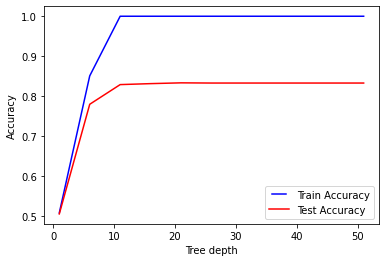

In [ ]:
max_depths = np.linspace(1, 51, 11, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators = 200, criterion = "entropy", random_state = 42,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=max_depth,bootstrap=False)
   rf.fit(X_train_vec, y_train)
   train_pred = rf.predict(X_train_vec)
   train_acc=rf.score(X_train_vec, y_train)
   train_results.append(train_acc)

   test_pred = rf.predict(X_test_vec)
   test_acc=rf.score(X_test_vec, y_test)
   test_results.append(test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

O gráfico acima mostra que não existem ganhos na accuracy global em considerar profundidades para as árvores superiores a 11. O overfitting é anulando se a profundidade máxima das árvores for 6.

* **Target com 3 labels**



O modelo seguinte é desenvolvido apenas com 3 labels, agregando penumonia viral e bacteriana. Recorda-se que o objetivo do projeto é distinguir bem o COVID-19 das restantes patologias e das situações normais. É ainda utilizada a profundidade máxima ótima identificada para as árvores: 6.

In [ ]:
Rfc = RandomForestClassifier(n_estimators = 200, criterion = "entropy", random_state = 42,min_samples_split=10, min_samples_leaf=1, max_features='sqrt',max_depth=6,bootstrap=False)
Rfc=Rfc.fit(X_train_vec, y_train3)
y_pred_3  = Rfc.predict(X_test_vec)


Accuracy_total_Rfc=Rfc.score(X_test_vec, y_test3)
print('Accuracy total:',Accuracy_total_Rfc)

cm = confusion_matrix(y_test3, y_pred_3)
conf_mat=pd.DataFrame(cm)
conf_mat.index.name='Actual'
conf_mat.columns.name='Predicted'
print(conf_mat)

print('accuracy total:', accuracy(cm))
print('precision covid:', precision(0,cm))
print('recall covid:', recall(0,cm))
print('precision total:', precision_macro_average(cm))
print('recall total:', recall_macro_average(cm))
print("label precision recall")
for label in range(len(unique_labels(y_test3))):
 print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

Accuracy total: 0.9067837969741337
Predicted    0    1    2
Actual                  
0          241   28    7
1           11  841   78
2            8   59  776
accuracy total: 0.9067837969741337
precision covid: 0.926923076923077
recall covid: 0.8731884057971014
precision total: 0.9114835537091635
recall total: 0.8993371421662988
label precision recall
    0     0.927  0.873
    1     0.906  0.904
    2     0.901  0.921


A performanca da random forest com 3 labels é de 90%, o que compara com 83% no caso do modelo com 4 labels. As métricas identificam uma boa classidicação das várias labels pelo modelo. O recall para o COVID é de 87%, pelo que, nesta classe, o modelo apresenta uma taxa de falsos negativos de 13% (apenas 7 casos são, no entanto, classificados como 'normais').

### 6.1.2 Ensemble-Adaptative Boosting

Esta secção apresenta um modelo de Adaptative Boosting.
Neste modelos, as classificações subsequentes são ajustadas a favor das classificadas erradas por classificações anteriores, sendo construídos *weak learners*.

In [ ]:
ada_tree = AdaBoostClassifier(n_estimators=100)
ada_tree=ada_tree.fit(X_train_vec, y_train)

In [ ]:
Y_pred_test = ada_tree.predict(X_test_vec)

In [ ]:
Accuracy_total_AdaBoost=ada_tree.score(X_test_vec, y_test)
print('Accuracy total:',Accuracy_total_AdaBoost)

conf_mat=confusion_matrix(y_test,Y_pred_test)
conf_mat=pd.DataFrame(conf_mat)
conf_mat.index.name='Actual'
conf_mat.columns.name='Predicted'
print(conf_mat)

Accuracy total: 0.6764275256222547
Predicted    0    1    2    3
Actual                       
0          242   23    2    9
1            4  253  224  148
2            1  115  153   32
3            2   85   18  738


Este modelo apresenta uma precisão de 67.6%, inferior às random forests. O maior erro continua associado à distinção entre pneumonia viral e bacteriana.

As características do AdaBoost tornam-no suscetível à perda da capacidade de generalização após a aprendizagem de muitos padrões de treino (overfitting), o que pode justificar a baixa accuracy. Constata-se, no entanto, que a accuracy no train set é de 70.4%, o que não evidencia overfitting significativo.

In [ ]:
ada_tree.score(X_train_vec, y_train)

0.7041243275552899

### 6.1.3 KNN
Apresenta-se nesta secção outra versão de classificaçao usando modelos de machine learning: K-NeighborsClassifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,p=1, weights='uniform')
knn_model=knn.fit(X_train_vec, y_train)
print(knn_model)
Y_pred_test = knn_model.predict(X_test_vec)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')


In [ ]:
conf_mat=confusion_matrix(y_test,knn.predict(X_test_vec))

conf_mat2=pd.DataFrame(conf_mat)
conf_mat2.index.name='Actual'
conf_mat2.columns.name='Predicted'
print(conf_mat2)

Predicted    0    1    2    3
Actual                       
0          256   10    6    4
1            3  514   82   30
2            5  159  123   14
3            2   45   22  774


In [ ]:
knn_model_score=knn_model.score(X_test_vec, y_test)
print('Score:',knn_model_score)

Score: 0.8135675939482675


O modelo KNN apresenta uma accuracy global de 81%, comparável com as random forests, sendo também o principal inibidor de uma accuracy superior a distinção entre pneumonia viral e bacteriana.

* **Target com 3 labels**

À semelhança dos modelos anteriores, aprsenta-se um modelo KNN desenvolvido apenas com 3 labels, agregando penumonia viral e bacteriana.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=1,p=1, weights='uniform')
knn_model3=knn3.fit(X_train_vec, y_train3)
print(knn_model3)
Y_pred_test3 = knn_model3.predict(X_test_vec)


conf_mat=confusion_matrix(y_test3,Y_pred_test3)
conf_mat=pd.DataFrame(conf_mat)
conf_mat.index.name='Actual'
conf_mat.columns.name='Predicted'

print(conf_mat)
knn_model_score=knn_model3.score(X_test_vec, y_test3)
print('Score:',knn_model_score)

Predicted    0    1    2
Actual                  
0          256   16    4
1            8  878   44
2            2   67  774
Score: 0.931185944363104


O modelo anterior apresenta uma accuracy de 93%, identificando 93% dos casos de COVID-19.

### 6.1.4 Ensemble - voting classifier

Nesta secção apresenta-se a performance de um modelo com classificadores distintos, usando um sistema de votação com pesos. Será atribuído um menor peso ao AdaBoost, por ter apresentado uma pior performance individual. Será usado o target com 4 labels.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1,p=1, weights='uniform')
ada_tree = AdaBoostClassifier(n_estimators=100)
Rfc = RandomForestClassifier(n_estimators = 200, criterion = "entropy", random_state = 42,min_samples_split=10, min_samples_leaf=1, max_features='sqrt',max_depth=6,bootstrap=False)

voting = VotingClassifier(estimators=[('knn', knn), ('ada_tree', ada_tree), ('Rfc', Rfc)], voting='soft', weights=[2, 1, 2])
# hard: usa class (0/1/2)
# soft: usa a probabilidade da classe

In [ ]:
voting = voting.fit(X_train_vec, y_train)

In [ ]:
print(voting.score(X_test_vec, y_test))

0.8135675939482675


In [ ]:
Y_pred_test = voting.predict(X_test_vec)

cm=confusion_matrix(y_test,Y_pred_test)
conf_mat=pd.DataFrame(cm)
conf_mat.index.name='Actual'
conf_mat.columns.name='Predicted'
print(conf_mat)

print('accuracy total:', accuracy(cm))
print('precision covid:', precision(0,cm))
print('recall covid:', recall(0,cm))
print('precision total:', precision_macro_average(cm))
print('recall total:', recall_macro_average(cm))
print("label precision recall")
for label in range(len(unique_labels(y_test))):
 print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

Predicted    0    1    2    3
Actual                       
0          256   10    6    4
1            3  514   82   30
2            5  159  123   14
3            2   45   22  774
accuracy total: 0.8135675939482675
precision covid: 0.9624060150375939
recall covid: 0.927536231884058
precision total: 0.7844882015514407
recall total: 0.7678734207795349
label precision recall
    0     0.962  0.928
    1     0.706  0.817
    2     0.528  0.409
    3     0.942  0.918


O ensemble de modelos originou uma accuracy de 81%. Não se verificam assim ganhos em relação aos modelos individuais mais preditivos (KNN e random forests).